In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Dataset: Download dataset valid, misalnya dari kaggle atau sumber terpercaya lainnya
url = 'https://raw.githubusercontent.com/anoBrain777/inifileai/master/housing.csv'
data = pd.read_csv(url)


In [ ]:
# Melihat sekilas data
print("Data awal:")
print(data.head())

# Menangani nilai yang hilang
data = data.dropna()

# Memilih fitur yang relevan
fitur = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
X = data[fitur]
y = data['median_house_value']

# Membagi data menjadi data latih dan data uji
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=42)


Data awal:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
# Membuat model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_latih, y_latih)

# Memprediksi harga rumah
y_prediksi = model.predict(X_uji)


In [ ]:
# Menghitung metrik evaluasi
mae = mean_absolute_error(y_uji, y_prediksi)
rmse = np.sqrt(mean_squared_error(y_uji, y_prediksi))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 51372.67217050068
Root Mean Squared Error (RMSE): 70156.120457364


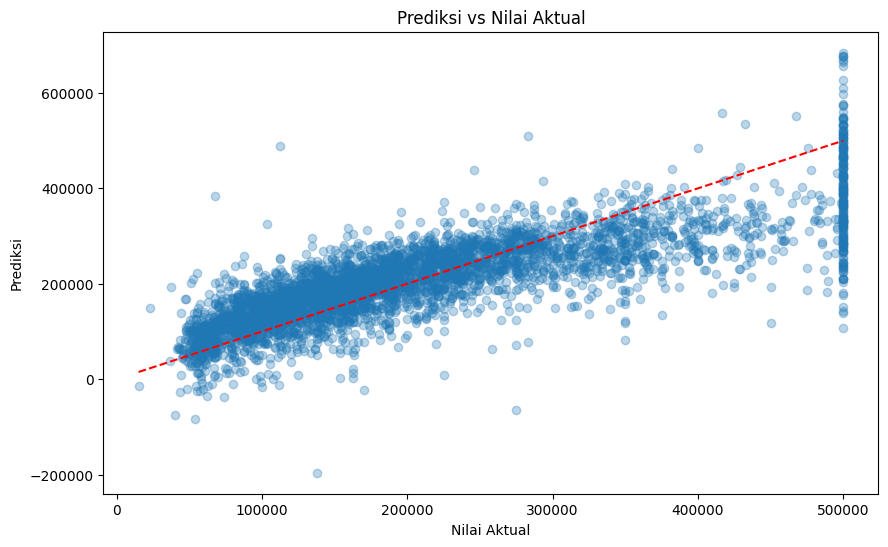

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_uji, y_prediksi, alpha=0.3)
plt.plot([y_uji.min(), y_uji.max()], [y_uji.min(), y_uji.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Aktual')
plt.show()
